In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import ast
from new_utils import calculate_cumulative_gain_ratio
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'new_combined_data.csv'


# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Now you can work with the DataFrame 'df' as needed
# print(df.head())  

In [4]:
teams_gain_ratios = {}

for index, row in df.iterrows():
    team_name = row['team_name']

    team_wins_string = row['wins']
    team_wins = ast.literal_eval(team_wins_string)

    exp_team_wins_string = row['exp_wins']
    exp_team_wins = ast.literal_eval(exp_team_wins_string)

    team_matches_home_string = row['matches_home']
    team_matches_home = ast.literal_eval(team_matches_home_string)

    cum_gain_ratio = calculate_cumulative_gain_ratio(team_wins, exp_team_wins, team_matches_home, True)

    teams_gain_ratios[team_name] = cum_gain_ratio




In [5]:
# Sorting the dictionary in order to have the teams with higher gain ratio on top x[1][-1] stands for
# "order my dict according to the last element [-1] of the value of the dict (key->[0], value->[1]) "

sorted_teams_gain_ratios = dict(sorted(teams_gain_ratios.items(), key=lambda x: x[1][-1], reverse=True))

print(sorted_teams_gain_ratios)

{'Werder Bremen': [0.0, 0.0, 0.9, 0.675, 1.03, 0.8583333333333334, 0.7357142857142858, 0.64375, 0.8777777777777778, 0.79, 0.7181818181818183, 0.6583333333333333, 0.6076923076923078, 0.7357142857142858, 0.6866666666666668, 0.64375, 0.6058823529411765, 1.8499999999999999, 1.8894736842105262], 'Girona': [2.0, 2.8500000000000005, 1.9000000000000004, 2.0250000000000004, 1.9900000000000002, 2.2083333333333335, 1.8928571428571428, 1.93125, 1.8766666666666667, 1.8800000000000001, 1.9318181818181819, 1.9625000000000001, 1.8115384615384615, 1.8014285714285714, 2.048, 2.01375, 1.8952941176470588, 1.926111111111111, 1.8247368421052632, 1.8185000000000002, 1.8452380952380956], 'Wolverhampton Wanderers': [0.0, 1.5, 1.0, 0.75, 0.6, 2.1666666666666665, 1.8571428571428572, 1.975, 1.7555555555555555, 1.58, 1.7090909090909092, 1.5666666666666667, 1.4461538461538461, 1.4714285714285715, 1.3733333333333335, 1.2875, 1.4235294117647062, 1.5555555555555558, 1.605263157894737, 1.5250000000000001], 'Nice': [0.0

In [6]:
#Filter the teams with best performance

N = 20  # Specify the number of teams you want

# Using list comprehension to create a new dictionary with the first N items
# best_teams = dict(list(sorted_teams_gain_ratios.items())[:N])

best_teams = {key: value for key, value in sorted_teams_gain_ratios.items() if value[-1] > 1}

/var/folders/gv/ndz7bsv11mdbb43r479ccdb40000gn/T/ipykernel_99732/693778177.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(index)


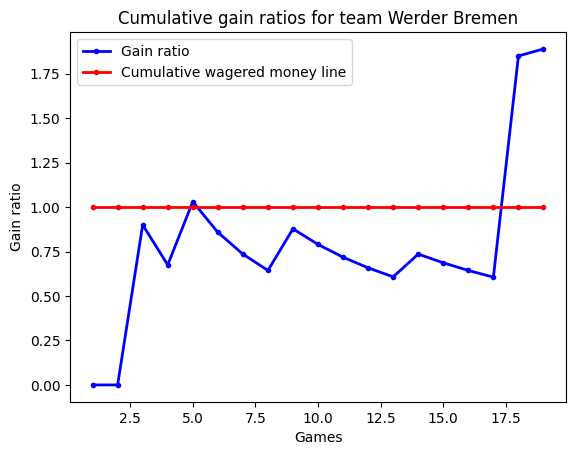

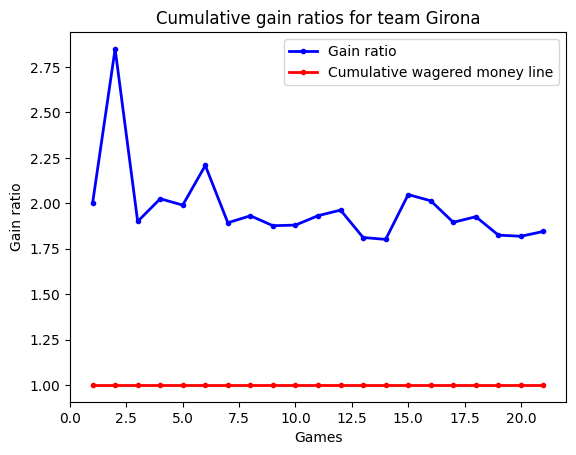

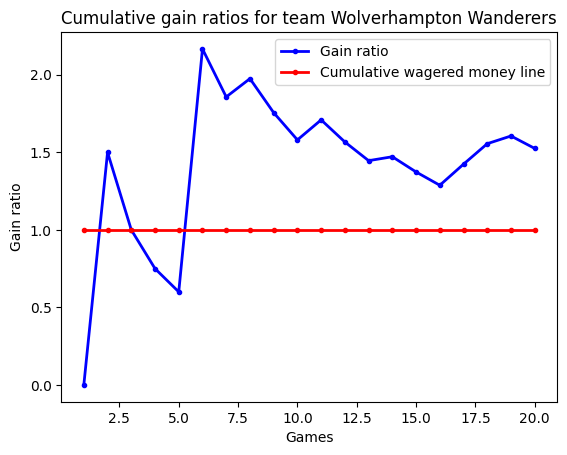

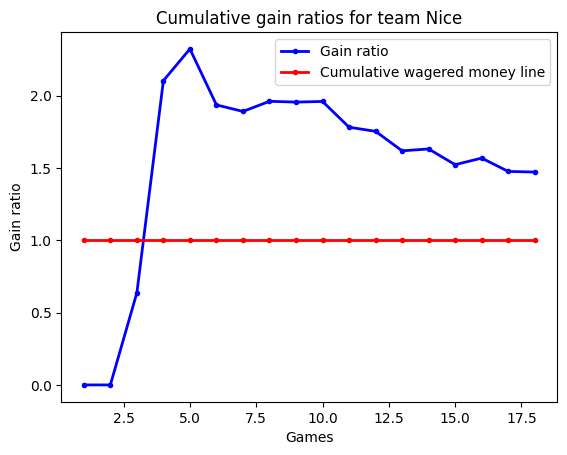

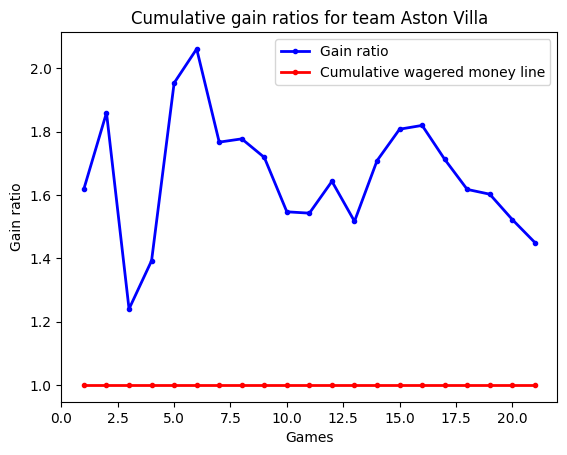

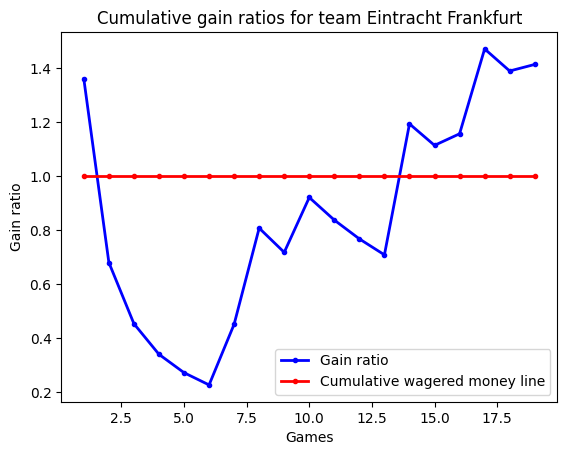

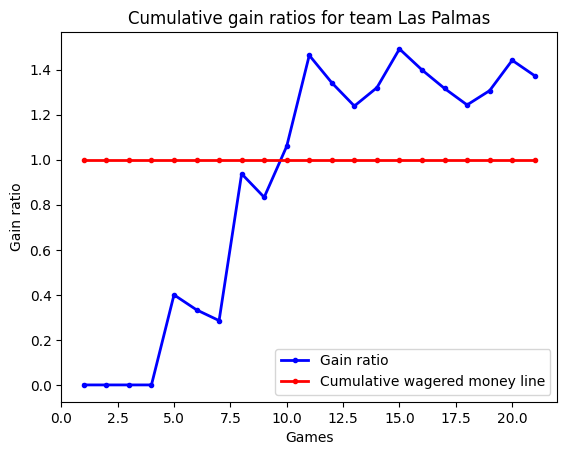

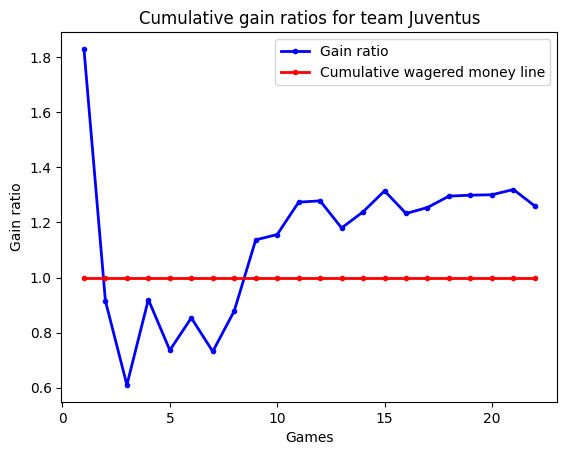

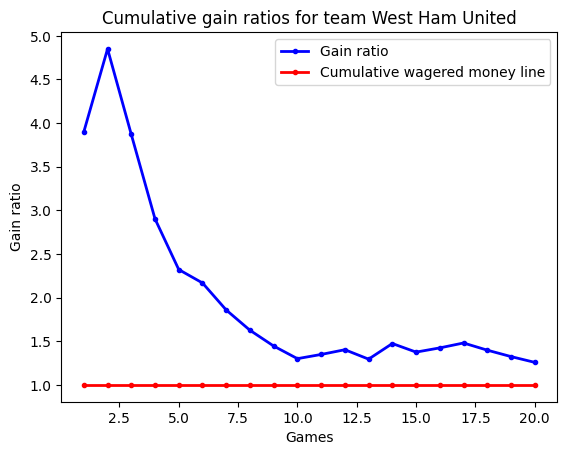

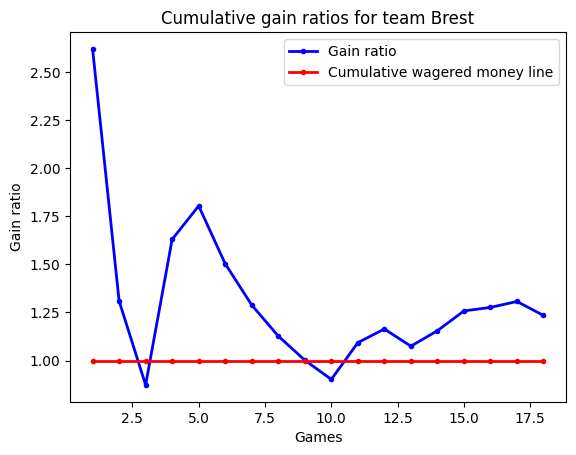

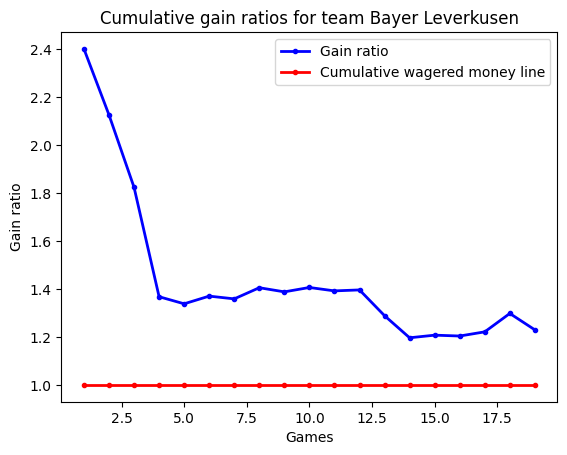

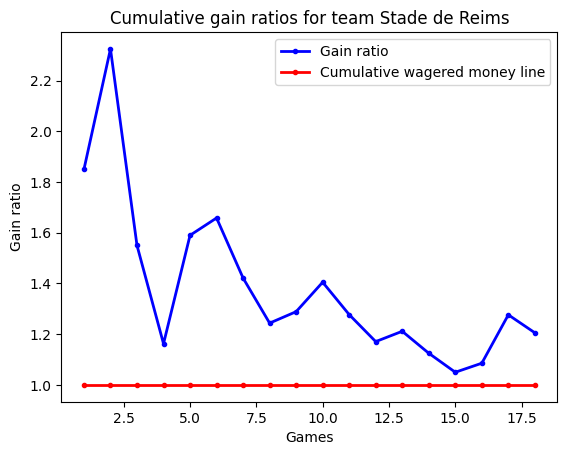

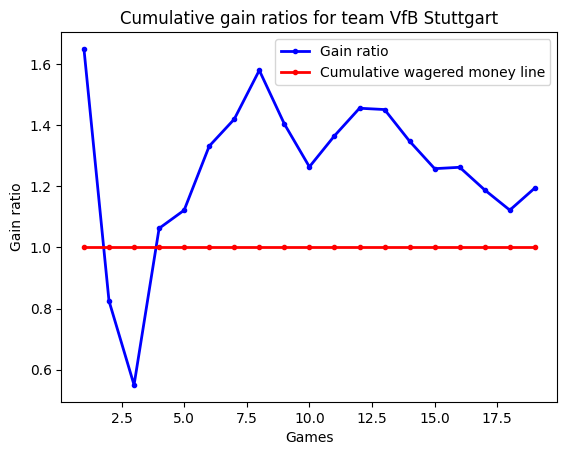

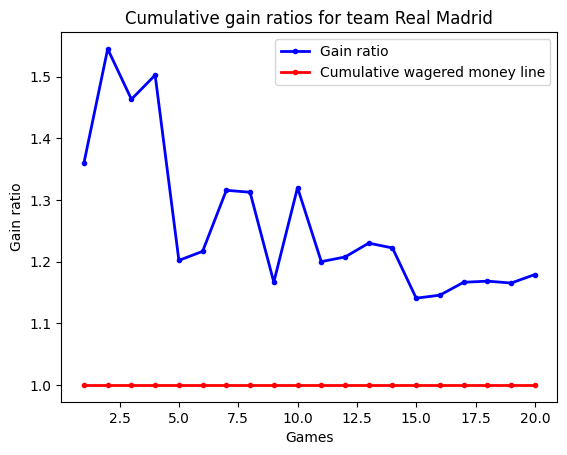

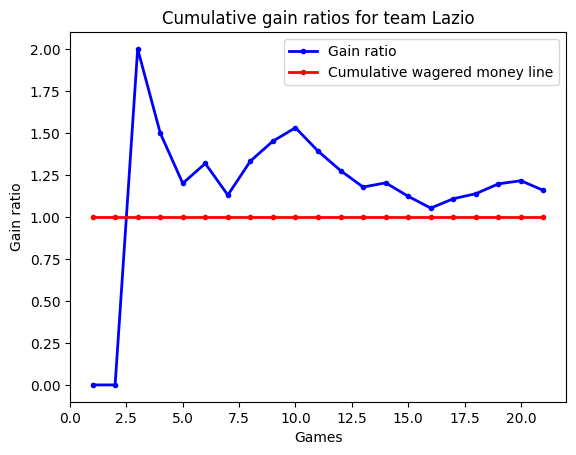

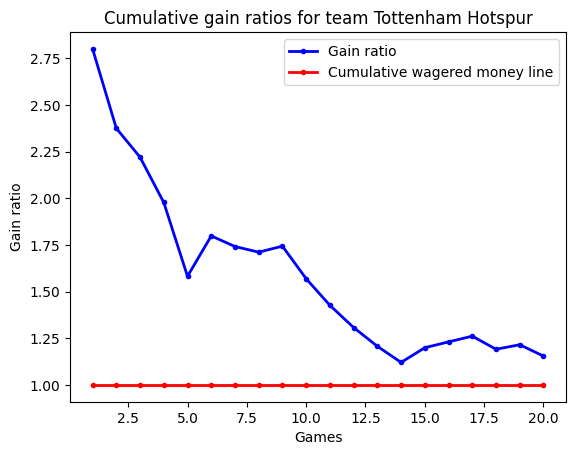

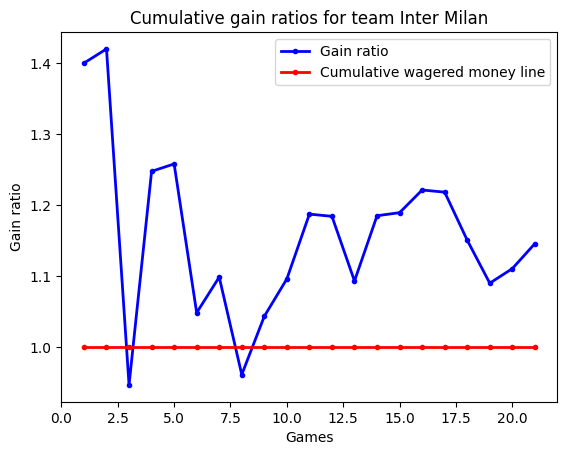

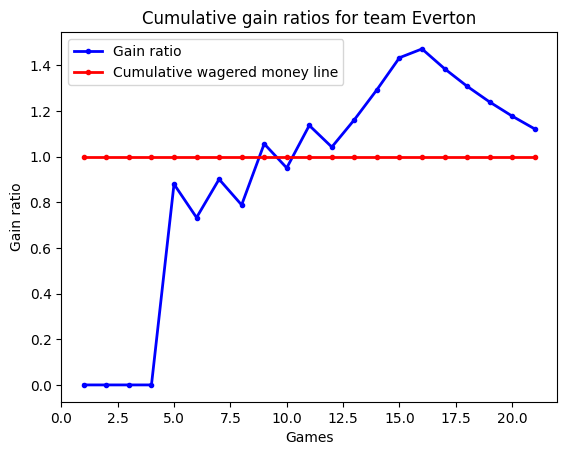

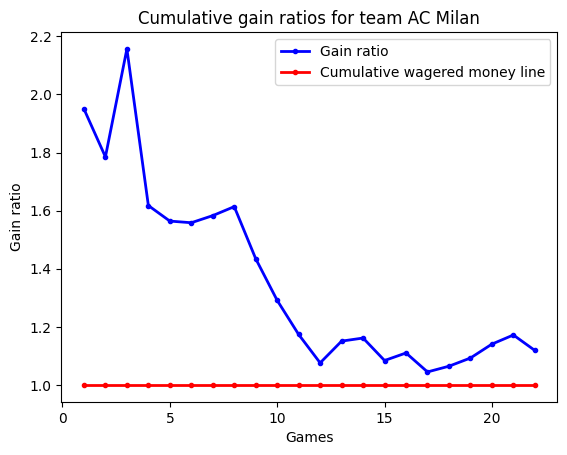

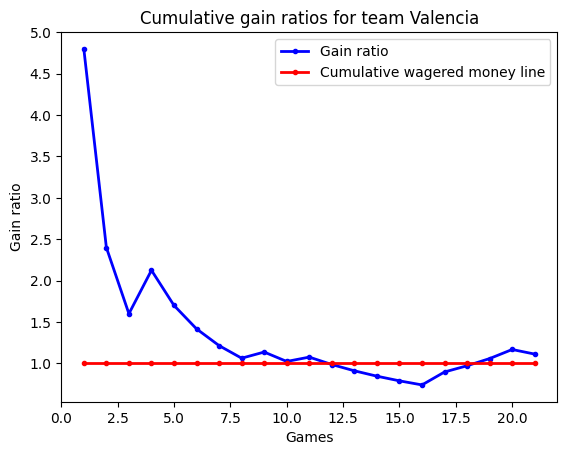

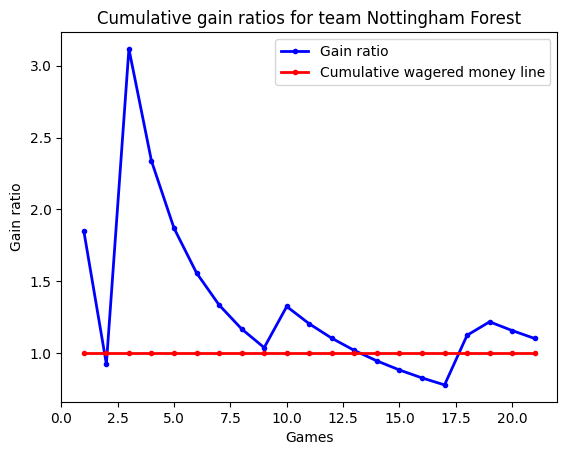

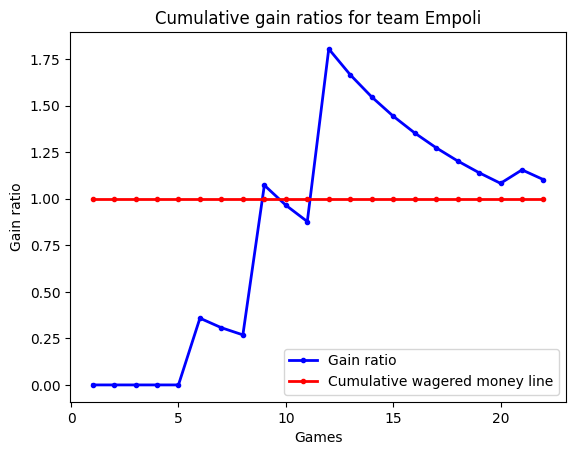

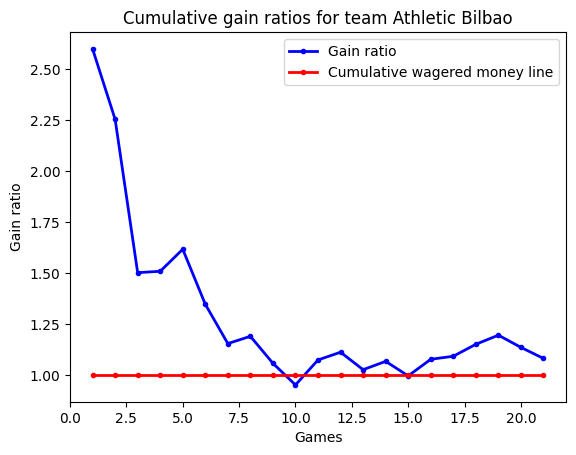

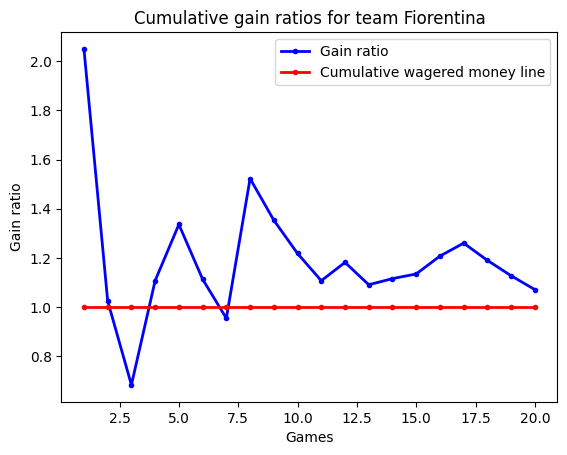

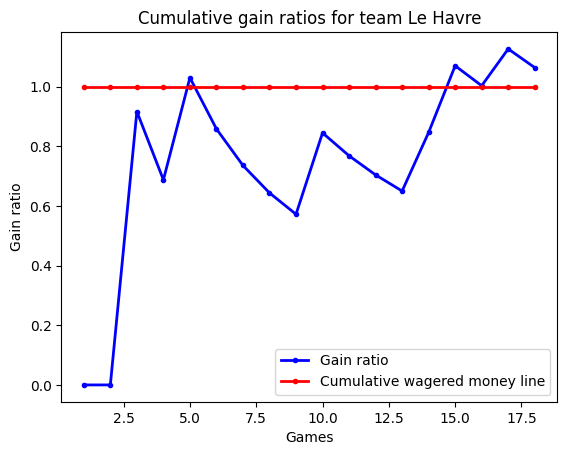

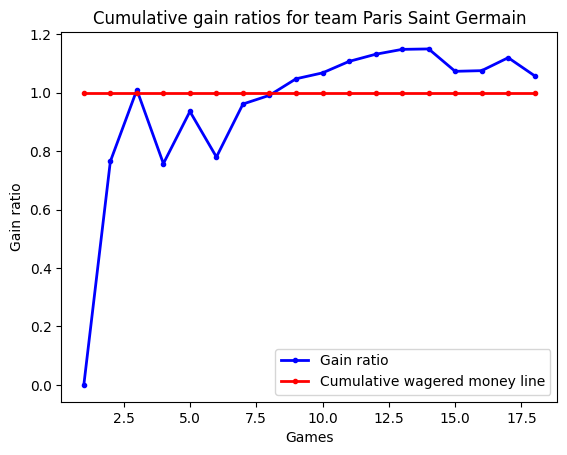

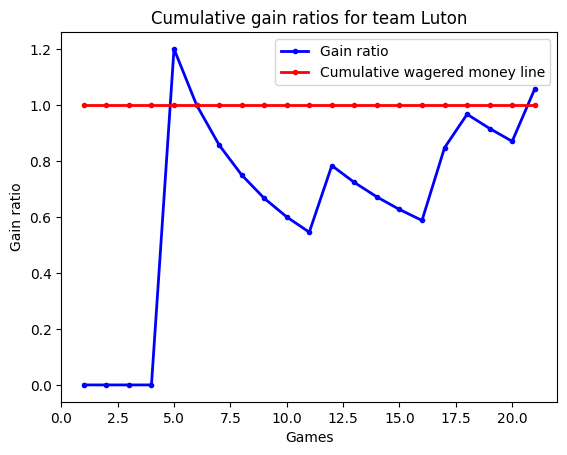

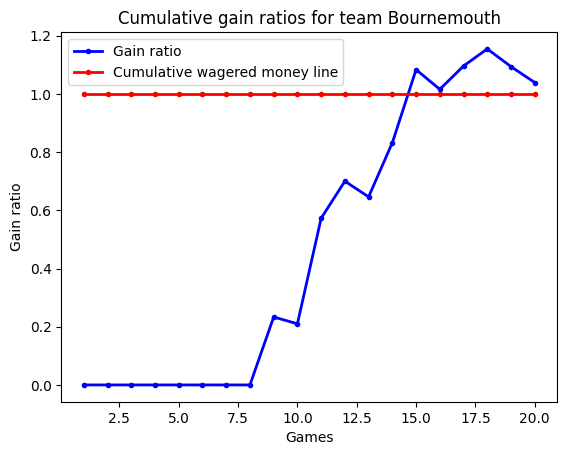

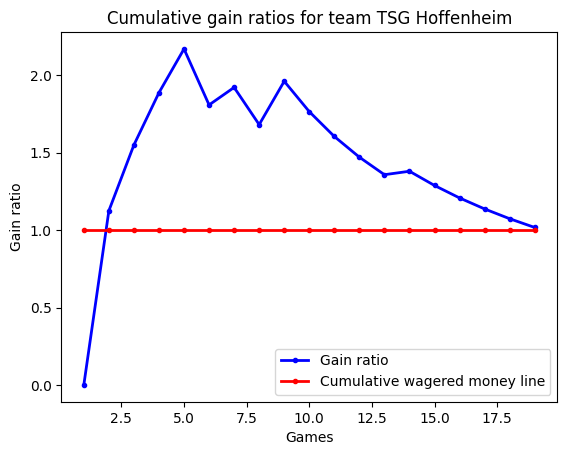

In [7]:
#Plotting best teams performance

index = 1

for key, value in best_teams.items():
    # print(f'Key: {key}, Value: {value}')
    # Create a scatter plot with connecting lines for the cumulative gain ratio
    plt.figure(index)
    x = range(1, len(value) + 1)
    plt.plot(x, value, color='blue', marker='.', linestyle='-', linewidth=2, label='Gain ratio')

    # Create a scatter plot with connecting lines for the reference line
    plt.plot(x, np.ones(len(value)), color='red', marker='.', linestyle='-', linewidth=2, label='Cumulative wagered money line')


    # Adding labels and title
    plt.xlabel('Games')
    plt.ylabel('Gain ratio')
    plt.title(f'Cumulative gain ratios for team {key}')
    # plt.xticks(converted_dates[::2])
    plt.legend()
    index +=1
# Show the plot
plt.show()